In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
fmg_data = pd.read_csv("FMG.AX.csv")

print("Data for ",fmg_data.shape[0]," days")

Data for  9301  days


In [3]:
fmg_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1988-01-29,0.140522,0.140522,0.140522,0.140522,0.054525,0.0
1,1988-02-01,0.140522,0.140522,0.140522,0.140522,0.054525,0.0
2,1988-02-02,0.140522,0.140522,0.140522,0.140522,0.054525,0.0
3,1988-02-03,0.140522,0.140522,0.140522,0.140522,0.054525,0.0
4,1988-02-04,0.140522,0.140522,0.140522,0.140522,0.054525,0.0


In [4]:
fmg_data.isna().sum(axis = 0)

Date           0
Open         146
High         146
Low          146
Close        146
Adj Close    146
Volume       146
dtype: int64

### Drop Rows with Missing Values as it do not constitute a significant portion of our dataset (only 146 na out of 9301)

In [5]:
fmg_data.dropna(inplace=True)
fmg_data.isna().sum(axis = 0)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
fmg_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9155.000000,9155.000000,9155.000000,9155.000000,9155.000000,9.155000e+03
mean,4.103480,4.164070,4.038634,4.098985,2.660072,7.247730e+06
std,6.421693,6.501520,6.334778,6.417056,5.321295,9.931788e+06
min,0.001756,0.001756,0.001756,0.001756,0.000681,0.000000e+00
25%,0.012759,0.012960,0.012759,0.012759,0.004951,0.000000e+00
50%,0.609000,0.617000,0.592000,0.612000,0.237465,3.645000e+06
75%,5.050000,5.130000,4.970000,5.040000,2.237583,1.160044e+07
max,29.820000,29.950001,29.500000,29.879999,28.707384,1.850619e+08


# 2) Plotting the Prices

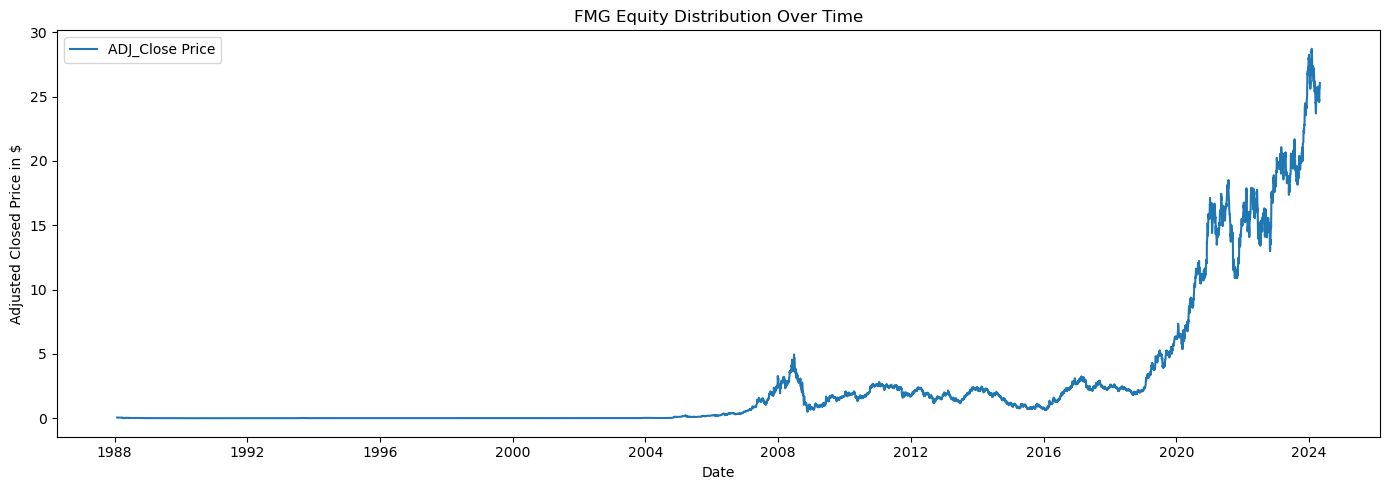

In [7]:
fmg_data['Date'] = pd.to_datetime(fmg_data['Date'])
plt.figure(figsize=(14, 5))  # Adjust the figure size as needed
plt.plot(fmg_data['Date'], fmg_data['Adj Close'], label='ADJ_Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Closed Price in $')
plt.title('FMG Equity Distribution Over Time')
plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

## Comments:
    The adjusted close price is plotted as it makes comparison across time convenient
     Adjusted Close takes into account stock splits, dividends and other corporate actions
## Observations:
    It can be seen the FMG peaks in around the 2024

# 3) Plotting Log Returns
Plotting Log returns vs time help to observe volatility.
Also helps observe general trend of the stock

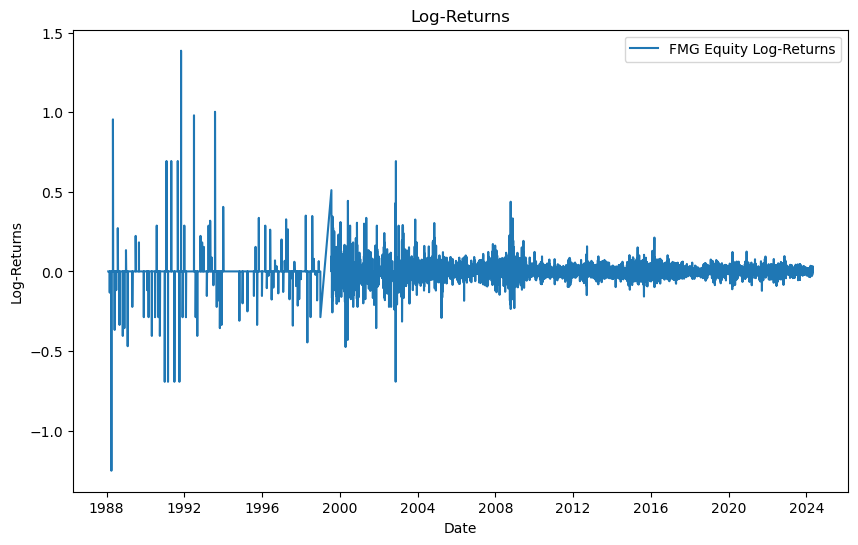

In [8]:
# Calculating Log returns and storing it in new column of dataframe fmg_data
fmg_data['Log_Returns'] = np.log(fmg_data['Adj Close']).diff()
plt.figure(figsize=(10, 6))
plt.plot(fmg_data['Date'],fmg_data['Log_Returns'], label='FMG Equity Log-Returns')
plt.xlabel('Date')
plt.ylabel('Log-Returns')
plt.title('Log-Returns')
plt.legend()
plt.show()

# 4) Checking Normality of Log Returns

## QQ Plot

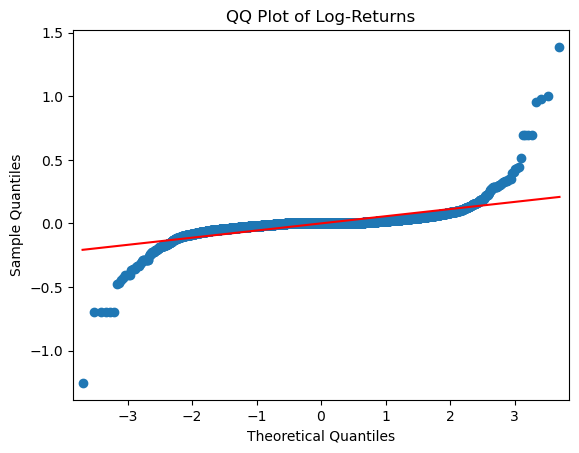

In [9]:
from statsmodels.graphics.gofplots import qqplot
# QQ Plot
qqplot(fmg_data['Log_Returns'].dropna(), line='s')
plt.title('QQ Plot of Log-Returns')
plt.show()

## Histogram

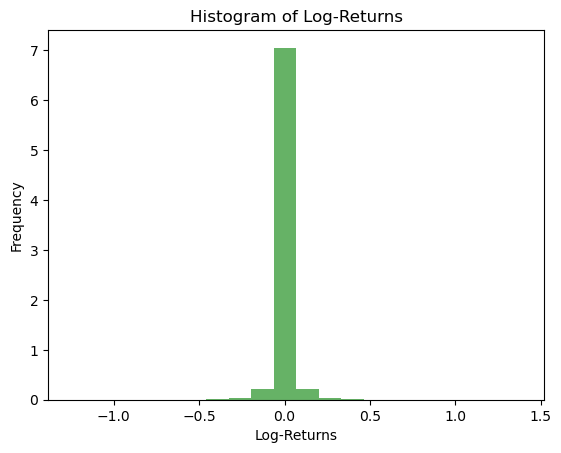

In [10]:
# Histogram
plt.hist(fmg_data['Log_Returns'].dropna(), bins=20, density=True, alpha=0.6, color='g')
plt.title('Histogram of Log-Returns')
plt.xlabel('Log-Returns')
plt.ylabel('Frequency')
plt.show()



## Kolmogrov-Smirnov Test , D'Agostino-Pearson's Test, Kolmogrov-Smirnov Test

In [11]:
from scipy.stats import jarque_bera, kstest, normaltest
import statsmodels.api as sm
alpha = 0.05

print("Null Hypothesis: Returns are Normally Distributed")
print("")

# Jarque-Bera Test
print("Jarque-Bera Test")
jb_stat, jb_p_value = jarque_bera(fmg_data['Log_Returns'].dropna())
print("Jarque-Bera Test Statistic:", jb_stat)

if(jb_p_value>alpha):
    print("We accept the Null Hypothesis,Log returns are not normally distributed according to Jarque-Bera Test")
else:
    print("We reject the Null Hypothesis,Log returns are not normally distributed according to Jarque-Bera Test")
print("")
# Kolmogorov-Smirnov Test
print("Kolmogorov-Smirnov Test")
ks_stat, ks_p_value = kstest(fmg_data['Log_Returns'].dropna(), 'norm')
print("Kolmogorov-Smirnov Test Statistic:", ks_stat)

if(ks_p_value>alpha):
    print("We accept the Null Hypothesis,Log returns are not normally distributed according to Kolmogorov-Smirnov Test")
else:
    print("We reject the Null Hypothesis,Log returns are not normally distributed according to Kolmogorov-Smirnov Test")
print("")
# D'Agostino-Pearson's Test
print("D'Agostino-Pearson's Test")
dap_stat, dap_p_value = normaltest(fmg_data['Log_Returns'].dropna())
print("D'Agostino-Pearson's Test Statistic:", dap_stat)

if(dap_p_value>alpha):
    print("We accept the Null Hypothesis,Log returns are not normally distributed according to D'Agostino-Pearson's Test")
else:
    print("We reject the Null Hypothesis,Log returns are not normally distributed according to D'Agostino-Pearson's Test")




Null Hypothesis: Returns are Normally Distributed

Jarque-Bera Test
Jarque-Bera Test Statistic: 6442987.188628093
We reject the Null Hypothesis,Log returns are not normally distributed according to Jarque-Bera Test

Kolmogorov-Smirnov Test
Kolmogorov-Smirnov Test Statistic: 0.44516357446692667
We reject the Null Hypothesis,Log returns are not normally distributed according to Kolmogorov-Smirnov Test

D'Agostino-Pearson's Test
D'Agostino-Pearson's Test Statistic: 6282.754909460969
We reject the Null Hypothesis,Log returns are not normally distributed according to D'Agostino-Pearson's Test


## OBSERVATIONS:
    From the histogram plot, qq-plot we observed the data didn't quite follow normal distribution
    This claim stands stronger with Jarque Bera, Kolmogrov-Smirnov, D'Agostino's tests
    rejecting the Null Hypothesis, and hence data does not follow normal distribution.

# 5) Estimating Historical Volatility Using Log Returns

In [12]:
# Estimate Historical Volatility
print("Estimate Historical Volatility")
print("")
daily_volatility = fmg_data['Log_Returns'].std()
annual_historical_volatility = np.std(fmg_data['Log_Returns']) * np.sqrt(252)  # Assuming 252 trading days in a year
print("Daily Volatility: ",daily_volatility)
print(" ")
print("Annual Historical Volatility:", annual_historical_volatility)

Estimate Historical Volatility

Daily Volatility:  0.056217849243989294
 
Annual Historical Volatility: 0.8923819433288527


# 6) Identifying Risk Free Rate for AUD
Source for RFR: CNBC`

In [13]:
rfr = 0.044210
print("")
print("Risk Free Rate for AUD=",rfr)


Risk Free Rate for AUD= 0.04421


# 7) Testing if Log Returns are independent/uncorrelated

In [14]:
print("Log-Returns Independence/Uncorrelated")

# Test Assumption of Log-Returns Independence/Uncorrelated
acf = sm.tsa.acf(fmg_data['Log_Returns'].dropna())

print("")
print("Finding lag with max auto-correlation ")
# Finding lag with max auto-correlation

max_arg_index = acf[1:].argmax() + 1
print("max_arg_index=",max_arg_index)
if(acf[max_arg_index] == np.max(acf[1:])):
    print("max_arg= ",acf[max_arg_index])

print(" ")

durbin_watson_stat = sm.stats.stattools.durbin_watson(fmg_data['Log_Returns'].dropna())
print("Autocorrelation:", acf)
print("Durbin-Watson Statistic:", durbin_watson_stat)

Log-Returns Independence/Uncorrelated

Finding lag with max auto-correlation 
max_arg_index= 37
max_arg=  0.01938659284483168
 
Autocorrelation: [ 1.00000000e+00 -2.19106080e-02 -1.35786480e-02 -1.92538284e-02
 -6.30819827e-03  2.11683405e-03  1.43091178e-02 -3.33209258e-03
 -5.28581351e-03 -6.61427509e-04 -6.61157106e-03  2.71106572e-03
  8.16057092e-03 -4.74193666e-03  1.52471103e-03 -5.69033759e-03
 -3.17883536e-03 -6.23891889e-03  2.11895411e-03  4.43085276e-03
 -7.28336838e-05 -6.02302260e-02 -2.86825585e-02 -6.21104047e-02
  2.32024565e-04 -9.52167017e-03  3.49454893e-03  2.91331581e-03
  1.91200135e-02  5.71164141e-03  1.13890696e-02 -1.12823694e-02
 -1.09849219e-02 -1.60342193e-03 -1.92728312e-03 -5.86434544e-03
  2.25726686e-03  1.93865928e-02  6.00562482e-04  6.28817672e-03]
Durbin-Watson Statistic: 2.043520705974431


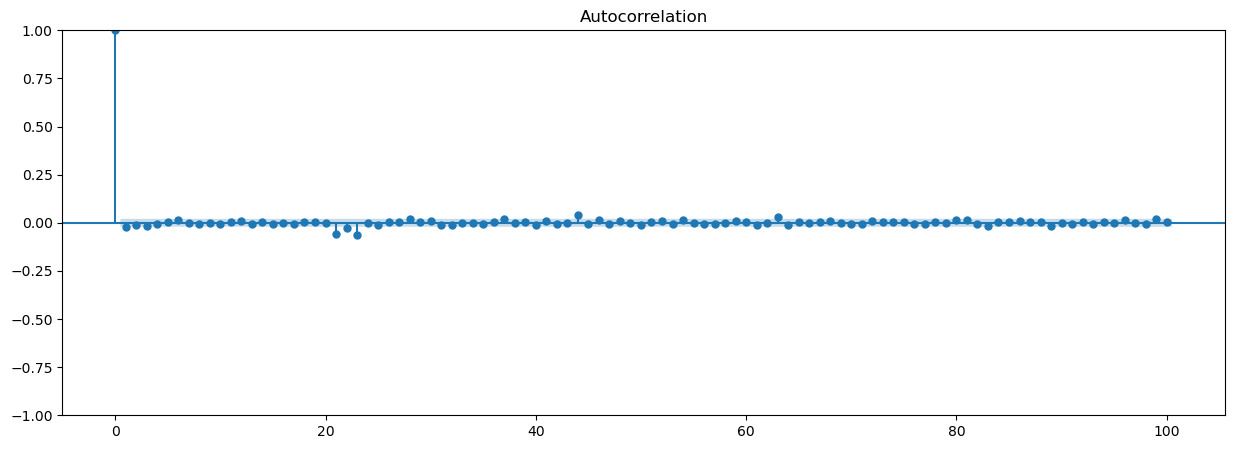

In [15]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
plt.rc("figure", figsize = (15, 5))
plot_acf(fmg_data['Log_Returns'].dropna(), lags = 100)
plt.show()

Plot of Lag of 37, which had max auto correlation


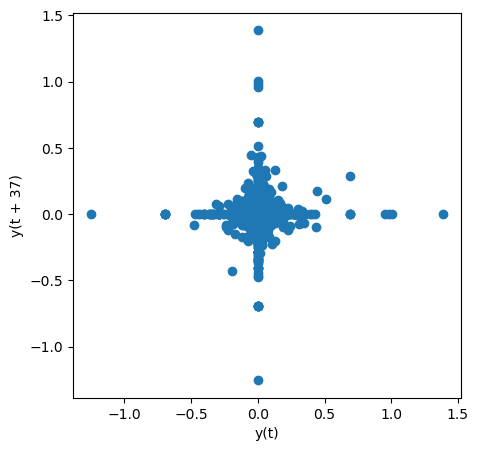

In [16]:
# Plot of Lag of 71, which had max auto correlation, it's plot too doesn't show any
print("Plot of Lag of 37, which had max auto correlation")
fig = plt.figure(figsize = (5, 5))
pd.plotting.lag_plot(fmg_data['Log_Returns'], lag = max_arg_index)
plt.show()

# 8.In-The-Money (ITM) European call option and In-The-Money European put option for the maturity May31, 2024
# AND
# 9. Using CRR, Black-Scholes and Simulation Methods

In [17]:
from datetime import date
import math

def nCr(n, r):
    return math.comb(n, r)

## CRR MODEL

In [18]:
def crr_price(s0, strike, maturity_date, rfr, sigma, steps, dividend=0, option_type='call', pricing_date=date.today()):
    """
    s0: current stock price
    strike: strike price of the option
    rfr: risk-free interest rate
    sigma: volatility
    maturity_date: [day, date, year] all should be without leading zeros
    steps: number of steps in the CRR model
    dividend: dividend paid by the stock
    option_type: 'call' or 'put'
    pricing_date: [day, date, year] all should be without leading zeros, tells when
    """

    md = date(maturity_date[2], maturity_date[1], maturity_date[0])
    pd = date(pricing_date[2], pricing_date[1], pricing_date[0])
    maturity_time = ((md - pd).days) / 365
    delta = maturity_time / steps
    u = np.exp(sigma * np.sqrt(delta))
    d = 1 / u

    if not dividend:
        p_ = (np.exp(rfr * delta) - d) / (u - d)
    else:
        p_ = (np.exp((rfr - dividend) * delta) - d) / (u - d)

    option_price = 0

    for ups in range(0, steps + 1):
        downs = steps - ups
        curr_stock_price = s0 * (u ** ups) * (d ** downs)
        curr_payoff = 0

        if option_type == 'call':
            curr_payoff = max(curr_stock_price - strike, 0)
        else:
            curr_payoff = max(strike - curr_stock_price, 0)

        option_price += nCr(steps, ups) * (p_ ** ups) * ((1 - p_) ** downs) * curr_payoff

    option_price = option_price / ((1 + rfr * delta) ** steps)

    return option_price

In [19]:
s0 = fmg_data[fmg_data['Date'] == '2024-04-30']['Adj Close'].iloc[0]
# Get the current stock price of FMG on April 30,2024
# Maturity date= May 31,2024

strike = s0 - 0.2 * s0  # Assuming the call option price is arbitrarily 20% less than the current stock price
strike_put = s0 + 0.2 * s0  # Assuming the put option strike price is arbitrarily 20% higher than the current stock price
s0, strike
print("current stock price=",s0);
print("call strike=",strike)
print("put strike=",strike_put)

current stock price= 26.049999
call strike= 20.8399992
put strike= 31.259998799999998


In [20]:
print("CRR Model In-The-Money (ITM) European call option= ",crr_price(s0=s0, strike=strike, rfr=rfr, sigma=annual_historical_volatility,maturity_date=[31, 5, 2024], steps=1000, dividend=0.02, option_type='call', pricing_date=[30, 4, 2024]))
print("CRR Model In-The-Money (ITM) European put option= ",crr_price(s0=s0, strike=strike_put, rfr=rfr, sigma=annual_historical_volatility,maturity_date=[31, 5, 2024], steps=1000, dividend=0.02, option_type='put', pricing_date=[30, 4, 2024]))


CRR Model In-The-Money (ITM) European call option=  5.886638438441413
CRR Model In-The-Money (ITM) European put option=  6.201445909488313


## Black-Scholes-Merton Model

In [21]:
from scipy.stats import norm
# Black-Scholes model
def bsm_price(s0, strike, rfr, sigma, maturity_date, pricing_date=[5, 5, 2023], option_type='call'):
    """
    s0: current stock price
    strike: strike price of the option
    rfr: risk free interest rate
    sigma: volatility
    maturity_date: [day, date, year] all should be without leading zeros
    pricing_date: [day, date, year] all should be without leading zeros, tells when
    option_type: 'call' or 'put'
    """
    md = date(maturity_date[2], maturity_date[1], maturity_date[0])
    pd = date(pricing_date[2], pricing_date[1], pricing_date[0])
    maturity_time = ((md - pd).days) / 365
    d1 = (np.log(s0 / strike) + (rfr + (sigma ** 2) / 2) * maturity_time) / (sigma * np.sqrt(maturity_time))
    d2 = d1 - sigma * np.sqrt(maturity_time)
    option_price = None
    call_option_price = s0 * norm.cdf(d1) - strike * np.exp(-1 * rfr * maturity_time) * norm.cdf(d2)
    if option_type == 'call':
        option_price = call_option_price
    else:
        option_price = call_option_price + strike * np.exp(-1 * rfr * maturity_time) - s0
    return option_price

In [22]:
print("Black-Scholes-Merton Model In-The-Money (ITM) European call option= ",bsm_price(s0=s0, strike=strike, rfr=rfr, sigma=annual_historical_volatility, maturity_date=[31, 5, 2024], pricing_date=[30, 4, 2024], option_type='call'))
print("Black-Scholes-Merton Model In-The-Money (ITM) European put option= ",bsm_price(s0=s0, strike=strike_put, rfr=rfr, sigma=annual_historical_volatility, maturity_date=[31, 5, 2024], pricing_date=[30, 4, 2024], option_type='put'))


Black-Scholes-Merton Model In-The-Money (ITM) European call option=  5.923530495968041
Black-Scholes-Merton Model In-The-Money (ITM) European put option=  6.170280656766813


## Simulation with Geometric Brownian Motion

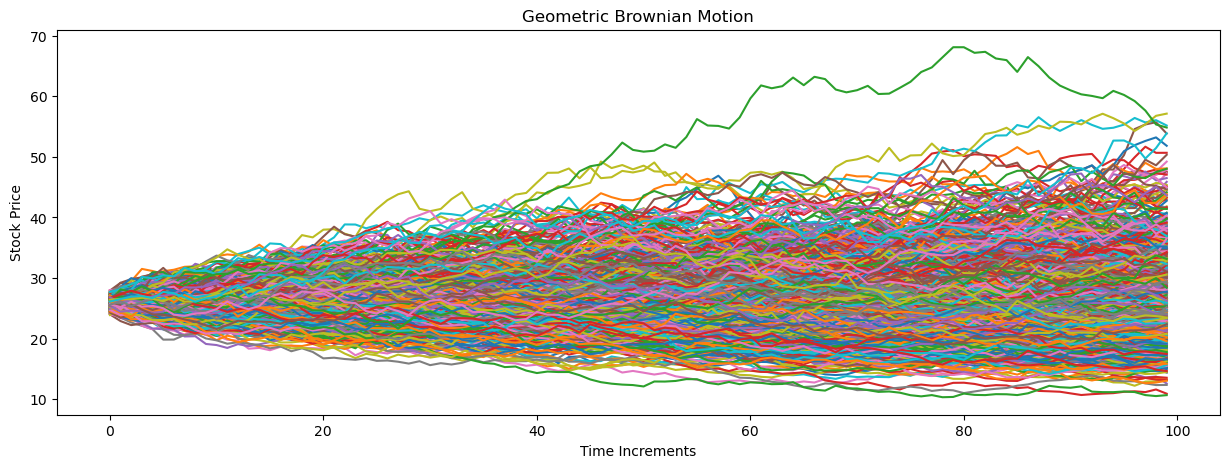

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def GBM_paths(S, T, r, q, sigma, steps, N):
  """
  Inputs
  #S = Current stock Price
  #K = Strike Price
  #T = Time to maturity 1 year = 1, 1 months = 1/12
  #r = risk free interest rate
  #q = dividend yield
  # sigma = volatility
  Output
  # [steps,N] Matrix of asset paths
  """
  # S(t) = S(0)*exp(mu-sigm**2/2)+ sigma*B(t) GBM.
  dt = T/steps
  ST = np.log(S) + np.cumsum(((r - q - sigma**2/2)*dt +\
  sigma*np.sqrt(dt) * \
  np.random.normal(size=(steps,N))),axis=0)
  return np.exp(ST)

# S=stock price S_{0} s0
T = 31/365.0 # time to maturity
r = rfr # risk free risk in annual %
q = 0 # annual dividend rate = N/A
sigma = annual_historical_volatility # annual volatility in %
steps = 100 # time steps
N = 1000 # number of trials
paths = GBM_paths(s0,T,r,q,sigma,steps,N)
plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")
plt.show()


In [24]:
payoffs = np.maximum(paths[-1]-strike, 0)
call_simulated_option_price = np.mean(payoffs)*np.exp(-r*T) #discounting t
print(" ")
print(f"Simulation Method Call option price is {call_simulated_option_price}")
print("")
payoffs = np.maximum(strike_put-paths[-1], 0)
call_simulated_option_price = np.mean(payoffs)*np.exp(-r*T) #discounting t
print(" ")
print(f"Simulation Method Put option price is {call_simulated_option_price}")
print("")

 
Simulation Method Call option price is 5.95045605928565

 
Simulation Method Put option price is 6.286277479401012



# 10. Estimate the volatility parameter other than the historical volatility
# Volatility Estimation by Garch (Generalized Auto Regressive Conditional Heteroskedasticity) Method

In [25]:
!pip install arch

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from arch import arch_model
def garch_volatility(x):
    model = arch_model(y = x, vol = 'GARCH', p = 1, q = 1)
    res = model.fit(disp = 'off')
    return res.conditional_volatility[-1]

# mutliplied data by 10 due to scaling error, later divided by 10 as well
daily_gv = garch_volatility(fmg_data['Log_Returns'].dropna().values * 10)/10
annual_gv = daily_gv * np.sqrt(252) # Assuming 252 trading days in a year
print("daily garch volatality=",daily_gv)
print("annual garch volatality=",annual_gv)
print("")

daily garch volatality= 0.04258818721221279
annual garch volatality= 0.6760665129154574



## Recalculating With Volatility from GARCH Method

## CRR MODEL with GARCH Volatility

In [27]:
print("GARCH Volatility CRR Model call and put option prices:")
print(" ")
print("CRR Model In-The-Money (ITM) European call option (GARCH volatility)= ",crr_price(s0=s0, strike=strike, rfr=rfr, sigma=annual_gv,maturity_date=[31, 5, 2024], steps=1000, dividend=0.02, option_type='call', pricing_date=[30, 4, 2024]))
print("CRR Model In-The-Money (ITM) European put option (GARCH volatility)= ",crr_price(s0=s0, strike=strike_put, rfr=rfr, sigma=annual_gv,maturity_date=[31, 5, 2024], steps=1000, dividend=0.02, option_type='put', pricing_date=[30, 4, 2024]))
print(" ")

GARCH Volatility CRR Model call and put option prices:
 
CRR Model In-The-Money (ITM) European call option (GARCH volatility)=  5.531146796969827
CRR Model In-The-Money (ITM) European put option (GARCH volatility)=  5.683513790815682
 


## Black-Scholes-Merton Model with GARCH Volatility

In [28]:
print("Black-Scholes-Merton Model call and put option prices:")
print(" ")
print("Black-Scholes-Merton Model In-The-Money (ITM) European call option (GARCH Volatility)= ",bsm_price(s0=s0, strike=strike, rfr=rfr, sigma=annual_gv, maturity_date=[31, 5, 2024], pricing_date=[30, 4, 2024], option_type='call'))
print("Black-Scholes-Merton Model In-The-Money (ITM) European put option (GARCH Volatility)= ",bsm_price(s0=s0, strike=strike_put, rfr=rfr, sigma=annual_gv, maturity_date=[31, 5, 2024], pricing_date=[30, 4, 2024], option_type='put'))

print(" ")

Black-Scholes-Merton Model call and put option prices:
 
Black-Scholes-Merton Model In-The-Money (ITM) European call option (GARCH Volatility)=  5.570827974635847
Black-Scholes-Merton Model In-The-Money (ITM) European put option (GARCH Volatility)=  5.648303170961917
 


## Simulation with Geometric Brownian Motion with GARCH Volatility

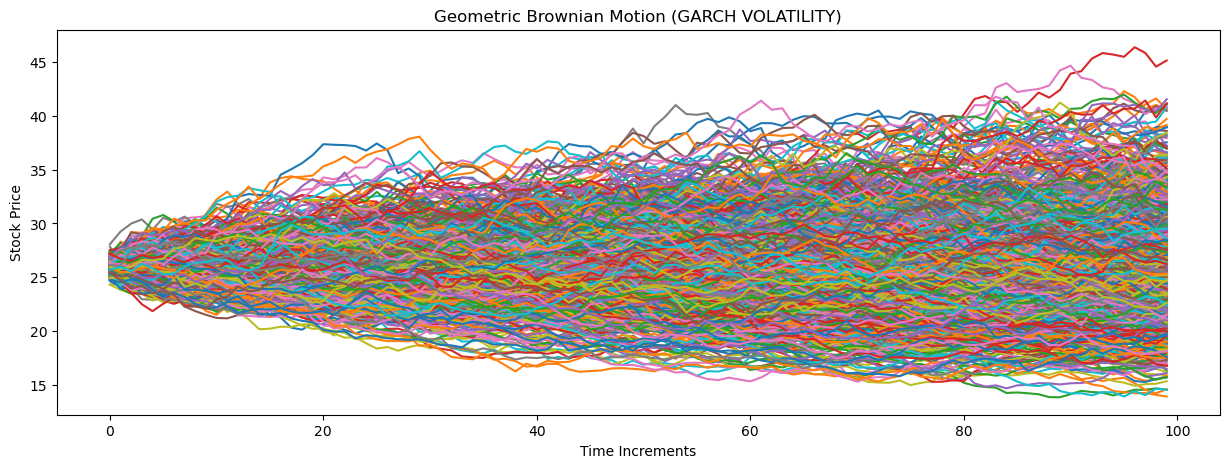

In [29]:
import numpy as np
import matplotlib.pyplot as plt
def GBM_paths(S, T, r, q, sigma, steps, N):
  """
  Inputs
  #S = Current stock Price
  #K = Strike Price
  #T = Time to maturity 1 year = 1, 1 months = 1/12
  #r = risk free interest rate
  #q = dividend yield
  # sigma = volatility
  Output
  # [steps,N] Matrix of asset paths
  """
  # S(t) = S(0)*exp(mu-sigm**2/2)+ sigma*B(t) GBM.
  dt = T/steps
  ST = np.log(S) + np.cumsum(((r - q - sigma**2/2)*dt +\
  sigma*np.sqrt(dt) * \
  np.random.normal(size=(steps,N))),axis=0)
  return np.exp(ST)

# S=stock price S_{0} s0
T = 31/365.0 # time to maturity
r = rfr # risk free risk in annual %
q = 0 # annual dividend rate = N/A
sigma = annual_gv # annual GARCH volatility in %
steps = 100 # time steps
N = 1000 # number of trials
paths = GBM_paths(s0,T,r,q,sigma,steps,N)
plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion (GARCH VOLATILITY)")
plt.show()


In [30]:
payoffs = np.maximum(paths[-1]-strike, 0)
call_simulated_option_price = np.mean(payoffs)*np.exp(-r*T) #discounting t
print(" ")
print(f"Simulation Method Call option price (GARCH Volatility) is {call_simulated_option_price}")
print("")
payoffs = np.maximum(strike_put-paths[-1], 0)
call_simulated_option_price = np.mean(payoffs)*np.exp(-r*T) #discounting t
print(" ")
print(f"Simulation Method Put option price (GARCH Volatility)is {call_simulated_option_price}")
print("")

 
Simulation Method Call option price (GARCH Volatility) is 5.489823499861419

 
Simulation Method Put option price (GARCH Volatility)is 5.707664747595342



# RESULTS:

## WITH HISTORICAL VOLATILITY:
    CRR Model In-The-Money (ITM) European call option=  5.886638438441413
    CRR Model In-The-Money (ITM) European put option=  6.201445909488313
 

    Black-Scholes-Merton Model In-The-Money (ITM) European call option=  5.923530495968041
    Black-Scholes-Merton Model In-The-Money (ITM) European put option=  6.170280656766813


    Simulation Method Call option price is 5.95045605928565
    Simulation Method Put option price is 6.286277479401012

## WITH GARACH VOLATILITY:

    CRR Model In-The-Money (ITM) European call option (GARCH volatility)=  5.531146796969827
    CRR Model In-The-Money (ITM) European put option (GARCH volatility)=  5.683513790815682
 

    Black-Scholes-Merton Model In-The-Money (ITM) European call option (GARCH Volatility)=  5.570827974635847
    Black-Scholes-Merton Model In-The-Money (ITM) European put option (GARCH Volatility)=  5.648303170961917


    Simulation Method Call option price (GARCH Volatility) is 5.489823499861419
    Simulation Method Put option price (GARCH Volatility)is 5.707664747595342


# Observation:
As Volatility from Garch was less than previous estimate, it was expected option prices
would reduce This is because high volatility options have more priced options Garch, providing a precise estimate of volatility helped us obtain a lesser option prices in BSM values and Simulated results